Importar Librerías

In [ ]:
#!pip install matplotlib
!pip install seaborn

In [41]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Conexión y Carga de Datos Dengue
Esta celda se conecta a la base de datos SQLite, extrae todos los registros de la tabla datos_dengue, los carga en un DataFrame de Pandas (df) y muestra las primeras filas para validación.

In [ ]:
# Conexión a la BD
conn = sqlite3.connect("C:\ProjectBI\Proyecto_ETL\data\dbProject.db")
df = pd.read_sql("SELECT * FROM datos_dengue;", conn)
df.head()

,consecutive,cod_eve,fec_not,semana,ano,cod_pre,cod_sub,edad,uni_med,nacionalidad,...,nom_upgd,pais_ocurrencia,nombre_evento,departamento_ocurrencia,municipio_ocurrencia,pais_residencia,departamento_residencia,municipio_residencia,departamento_notificacion,municipio_notificacion
0,3076019,210,None,21,2010,7689504656,1,14,1,None,...,ESE HOSPITAL DEPARTAMENTAL SAN RAFAEL,COLOMBIA,DENGUE,VALLE,ZARZAL,None,VALLE,ZARZAL,VALLE,ZARZAL
1,3076135,210,None,24,2010,6827602278,0,15,1,None,...,CORPORACION CRUZ BLANCA IPS SALUDCOOP CAÑAVERAL,COLOMBIA,DENGUE,SANTANDER,FLORIDABLANCA,None,SANTANDER,FLORIDABLANCA,SANTANDER,FLORIDABLANCA
2,3076147,210,None,49,2010,800103117,2,11,1,None,...,IPS CAPRECOM DISTRITO HOSPITAL NAZARETH,COLOMBIA,DENGUE,ATLANTICO,BARRANQUILLA,None,ATLANTICO,BARRANQUILLA,ATLANTICO,BARRANQUILLA
3,3076156,210,None,1,2010,6800101666,16,21,1,None,...,FUNDACION OFTALMOLOGICA DE SDER FOSCAL SEDE 36,COLOMBIA,DENGUE,SANTANDER,BUCARAMANGA,None,SANTANDER,BUCARAMANGA,SANTANDER,BUCARAMANGA
4,3076182,210,None,48,2010,7600103956,1,11,1,None,...,RED DE SALUD DEL NORTE ESE,COLOMBIA,DENGUE,VALLE,CALI,None,VALLE,CALI,VALLE,CALI


## Taxinomía de la data.

muestra el tamaño del dataset (filas y columnas), un resumen de los tipos de datos con valores nulos (info()) y estadísticas descriptivas básicas de las variables numéricas (describe()).

In [ ]:
# Número de filas y columnas
print("Dimensiones del dataset:", df.shape)
df.info()
df.describe()


Dimensiones del dataset: (1162201, 73)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162201 entries, 0 to 1162200
Data columns (total 73 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   consecutive                1162201 non-null  int64  
 1   cod_eve                    1162201 non-null  int64  
 2   fec_not                    0 non-null        object 
 3   semana                     1162201 non-null  int64  
 4   ano                        1162201 non-null  int64  
 5   cod_pre                    1162201 non-null  int64  
 6   cod_sub                    1162201 non-null  int64  
 7   edad                       1162201 non-null  int64  
 8   uni_med                    1162201 non-null  int64  
 9   nacionalidad               485139 non-null   object 
 10  nombre_nacionalidad        485139 non-null   object 
 11  sexo                       1162201 non-null  object 
 12  cod_pais_o                 1162

,consecutive,cod_eve,semana,ano,cod_pre,cod_sub,edad,uni_med,cod_pais_o,cod_dpto_o,...,cod_dpto_n,cod_mun_n,tip_cas,pac_hos,con_fin,ajuste,confirmados,consecutive_origen,va_sispro,estado_final_de_caso
count,1.162201e+06,1162201.0,1.162201e+06,1.162201e+06,1.162201e+06,1.162201e+06,1.162201e+06,1.162201e+06,1.162201e+06,1.162201e+06,...,1.162201e+06,1.162201e+06,1.162201e+06,1.162201e+06,1.162201e+06,1.162201e+06,1.162201e+06,1.162201e+06,1162201.0,1.162201e+06
mean,4.871254e+06,210.0,2.616605e+01,2.016345e+03,4.865875e+09,5.022374e+00,2.346075e+01,1.027026e+00,1.711738e+02,4.893922e+01,...,4.846673e+01,4.865872e+04,2.327147e+00,1.610599e+00,1.000044e+00,3.490308e-01,5.315053e-01,5.841865e+05,1.0,2.680259e+00
std,3.178067e+06,0.0,1.510257e+01,4.218401e+00,2.725066e+09,1.233684e+01,1.896587e+01,1.681412e-01,2.840602e+01,2.709837e+01,...,2.725827e+01,2.725067e+04,6.281291e-01,4.876146e-01,6.752869e-03,4.766639e-01,4.990066e-01,8.123960e+05,0.0,8.147202e-01
min,1.390000e+02,210.0,1.000000e+00,2.010000e+03,5.001000e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+00,5.001000e+03,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.0,2.000000e+00
25%,1.836599e+06,210.0,1.300000e+01,2.013000e+03,2.001101e+09,1.000000e+00,9.000000e+00,1.000000e+00,1.700000e+02,2.000000e+01,...,2.000000e+01,2.001100e+04,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.489100e+04,1.0,2.000000e+00
50%,4.049017e+06,210.0,2.500000e+01,2.016000e+03,5.400100e+09,1.000000e+00,1.700000e+01,1.000000e+00,1.700000e+02,5.400000e+01,...,5.400000e+01,5.400100e+04,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,8.555300e+04,1.0,3.000000e+00
75%,7.315354e+06,210.0,3.900000e+01,2.020000e+03,7.326801e+09,2.000000e+00,3.300000e+01,1.000000e+00,1.700000e+02,7.300000e+01,...,7.300000e+01,7.326800e+04,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.482419e+06,1.0,3.000000e+00
max,1.079265e+07,210.0,5.300000e+01,2.023000e+03,9.977384e+09,9.900000e+01,1.310000e+02,5.000000e+00,8.620000e+02,9.900000e+01,...,9.900000e+01,9.977300e+04,5.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.750502e+06,1.0,5.000000e+00


## Conteo de Nulos

DataFrame con el conteo de valores nulos por columna, ordenados de mayor a menor

In [53]:
# Conteo de nulos por columna
df_null = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))

df_null.head(50)

,0
fec_con,1162201
fec_not,1162201
ini_sin,1162201
fec_hos,1162201
fec_def,1162201
fecha_nto,1162201
fec_arc_xl,1162201
fec_aju,1162201
cbmte,1162157
cer_def,1162149


## Selección de Campos.

Esta celda filtra solo las columnas relevantes para el análisis, asegurando un dataset más limpio y manejable.

In [54]:
df = df[[
    "municipio_residencia", "ajuste", "departamento_notificacion", "tip_cas", 
    "estado_final_de_caso", "pac_hos", "con_fin", "departamento_residencia",
    "cod_mun_n", "pais_ocurrencia", "municipio_ocurrencia", "departamento_ocurrencia",
    "consecutive_origen", "nom_est_f_caso", "confirmados", "nombre_evento",
    "va_sispro", "consecutive", "cod_dpto_n", "per_etn", "semana", "ano",
    "cod_pre", "cod_sub", "edad", "uni_med", "nom_upgd"
]]

df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162201 entries, 0 to 1162200
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   municipio_residencia       1162195 non-null  object
 1   ajuste                     1162201 non-null  int64 
 2   departamento_notificacion  1162201 non-null  object
 3   tip_cas                    1162201 non-null  int64 
 4   estado_final_de_caso       1162201 non-null  int64 
 5   pac_hos                    1162201 non-null  int64 
 6   con_fin                    1162201 non-null  int64 
 7   departamento_residencia    1162201 non-null  object
 8   cod_mun_n                  1162201 non-null  int64 
 9   pais_ocurrencia            1162201 non-null  object
 10  municipio_ocurrencia       1162201 non-null  object
 11  departamento_ocurrencia    1162201 non-null  object
 12  consecutive_origen         1162201 non-null  int64 
 13  nom_est_f_caso             

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
municipio_residencia,1162195,1104,CALI,116097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ajuste,1162201.0,NaN,NaN,NaN,0.349031,0.476664,0.0,0.0,0.0,1.0,1.0
departamento_notificacion,1162201,33,VALLE,182799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tip_cas,1162201.0,NaN,NaN,NaN,2.327147,0.628129,2.0,2.0,2.0,3.0,5.0
estado_final_de_caso,1162201.0,NaN,NaN,NaN,2.680259,0.81472,2.0,2.0,3.0,3.0,5.0
pac_hos,1162201.0,NaN,NaN,NaN,1.610599,0.487615,1.0,1.0,2.0,2.0,2.0
con_fin,1162201.0,NaN,NaN,NaN,1.000044,0.006753,0.0,1.0,1.0,1.0,2.0
departamento_residencia,1162201,35,VALLE,181633,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_mun_n,1162201.0,NaN,NaN,NaN,48658.719071,27250.670069,5001.0,20011.0,54001.0,73268.0,99773.0
pais_ocurrencia,1162201,62,COLOMBIA,1159687,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Análisis del gráfico Casos de Dengue por Año.

* Máximos históricos:

    El 2010 presenta el mayor número de casos (147.224), seguido de 2013, 2019 y 2023 (todos por encima de 120.000).

    Esto evidencia brotes epidémicos en ciclos aproximados de 3 a 4 años.

* Mínimos y descensos:

    Los años con menor reporte fueron 2011 (29.386) y 2017 (25.048).

    Después de picos altos, suele presentarse un descenso pronunciado, lo que es típico de la dinámica epidemiológica del dengue.

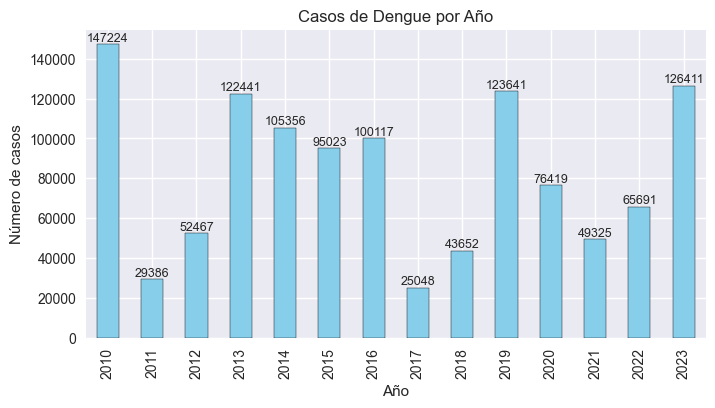

In [44]:
plt.style.use("seaborn-v0_8")
sns.set_palette("pastel")

# ======================
# 1. Casos por Año
# ======================
conteo_ano = df["ano"].value_counts().sort_index()
ax = conteo_ano.plot(kind="bar", figsize=(8,4), edgecolor="black", color="skyblue")
plt.title("Casos de Dengue por Año")
plt.xlabel("Año")
plt.ylabel("Número de casos")
for i, v in enumerate(conteo_ano):
    ax.text(i, v + 50, str(v), ha="center", va="bottom", fontsize=9)
plt.show()

## Casos de Dengue por Mes (sin separar años)

* Mayor incidencia: en mayo (111.065 casos) y diciembre (103.312 casos), lo que sugiere picos asociados a factores climáticos (transición de temporadas lluviosas).

* Meses intermedios altos: junio y julio superan los 97.000 casos, manteniendo una incidencia considerable.

* Menor incidencia: septiembre (85.414 casos) y agosto (88.640), reflejando un descenso hacia el final de la temporada seca.

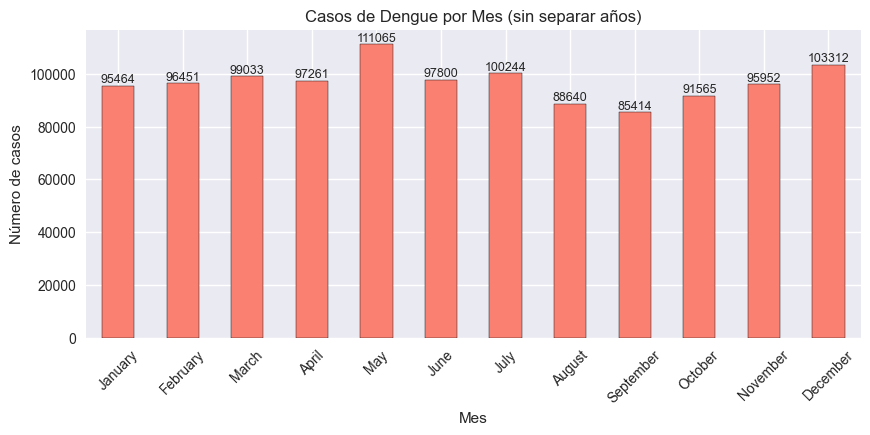

In [45]:
# ======================
# 2. Casos por Mes (acumulado)
# ======================
orden_meses = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

conteo_mes = df["nombre_mes"].value_counts().reindex(orden_meses)
ax = conteo_mes.plot(kind="bar", figsize=(10,4), color="salmon", edgecolor="black")
plt.title("Casos de Dengue por Mes (sin separar años)")
plt.xlabel("Mes")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
for i, v in enumerate(conteo_mes.fillna(0)):
    ax.text(i, v + 20, str(int(v)), ha="center", va="bottom", fontsize=9)
plt.show()

## Distribución de Edades de los Casos de Dengue

* Mayor concentración: en niños y jóvenes, especialmente entre 5 y 15 años, donde se observa el pico más alto (cerca de 200.000 casos).

* Tendencia decreciente: a medida que aumenta la edad, los casos disminuyen progresivamente, aunque se mantienen en adultos jóvenes y de mediana edad.

* Casos poco frecuentes: en mayores de 70 años, la incidencia es mucho más baja.

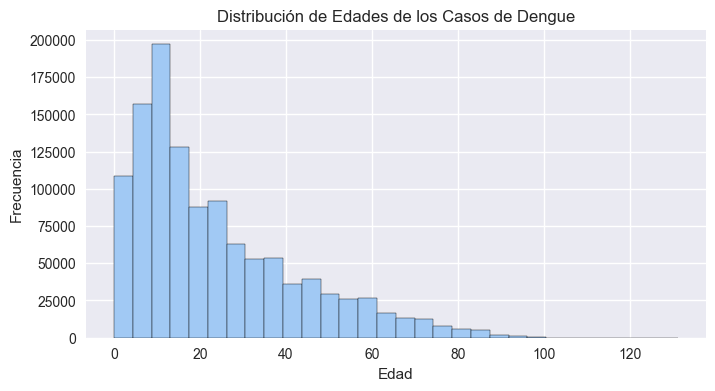

In [47]:
# ======================
# 4. Distribución de Edades
# ======================
ax = df["edad"].dropna().astype(int).plot(kind="hist", bins=30, figsize=(8,4), edgecolor="black")
plt.title("Distribución de Edades de los Casos de Dengue")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

## Top 10 Departamentos con más Casos de Dengue

* Valle del Cauca lidera ampliamente con más de 181.000 casos, casi el doble que los demás departamentos.

* En segundo y tercer lugar están Santander (101.383) y Antioquia (100.652), con cifras similares y significativamente altas.

* Tolima (93.632) y Meta (82.051) completan el grupo de departamentos con una carga alta.

* Departamentos como Norte de Santander, Atlántico y Huila se mantienen en un rango cercano a los 60.000 casos.

* Finalmente, Bolívar (48.006) y Cesar (43.920) cierran el top 10.

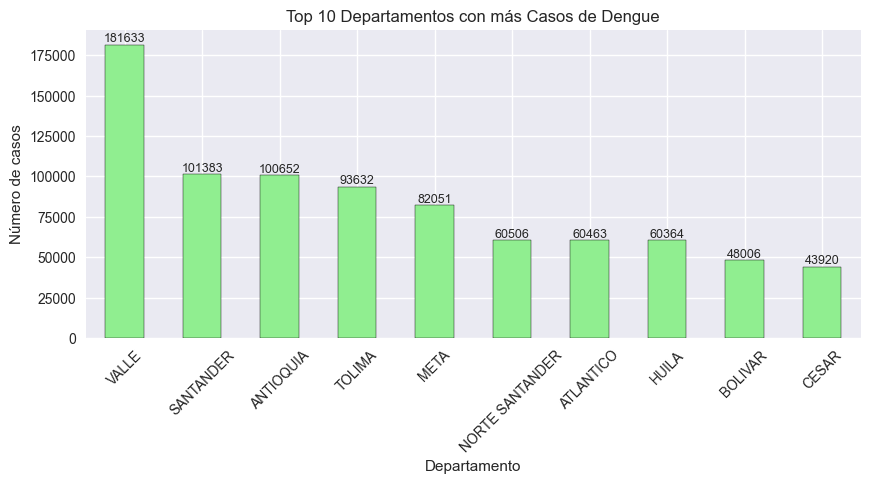

In [48]:
# ======================
# 5. Top 10 Departamentos con más Casos
# ======================
conteo_dep = df["departamento_residencia"].value_counts().head(10)
ax = conteo_dep.plot(kind="bar", figsize=(10,4), color="lightgreen", edgecolor="black")
plt.title("Top 10 Departamentos con más Casos de Dengue")
plt.xlabel("Departamento")
plt.ylabel("Número de casos")
plt.xticks(rotation=45)
for i, v in enumerate(conteo_dep):
    ax.text(i, v + 10, str(v), ha="center", va="bottom", fontsize=9)
plt.show()

## Estado Final de los Casos de Dengue

* Estado 2: 544.485 casos → representan pacientes que se recuperaron.
* Estado 3: 531.275 casos → corresponden a casos que terminaron en complicaciones graves.
* Estado 5: 86.441 casos →  Resultaron en fallecimiento.

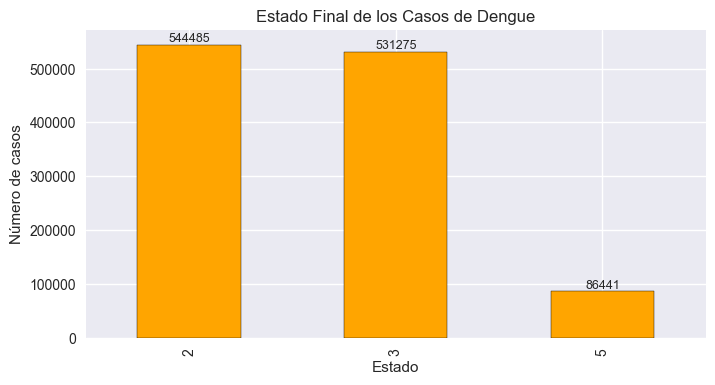

In [49]:
# ======================
# 6. Estado Final de los Casos
# ======================
conteo_estado = df["estado_final_de_caso"].value_counts()
ax = conteo_estado.plot(kind="bar", figsize=(8,4), color="orange", edgecolor="black")
plt.title("Estado Final de los Casos de Dengue")
plt.xlabel("Estado")
plt.ylabel("Número de casos")
for i, v in enumerate(conteo_estado):
    ax.text(i, v + 5, str(v), ha="center", va="bottom", fontsize=9)
plt.show()

## Casos Hospitalizados

* El valor 2 representa a los pacientes no hospitalizados, que suman 709.639 casos (mayoría).

* El valor 1 corresponde a los pacientes hospitalizados, con 452.562 casos.

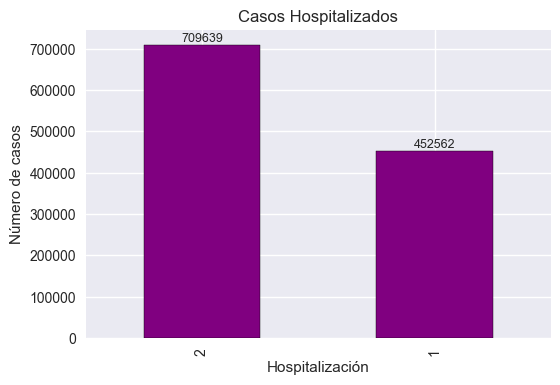

In [50]:
# ======================
# 7. Casos Hospitalizados vs No Hospitalizados
# ======================
conteo_hosp = df["pac_hos"].value_counts()
ax = conteo_hosp.plot(kind="bar", figsize=(6,4), color="purple", edgecolor="black")
plt.title("Casos Hospitalizados")
plt.xlabel("Hospitalización")
plt.ylabel("Número de casos")
for i, v in enumerate(conteo_hosp):
    ax.text(i, v + 5, str(v), ha="center", va="bottom", fontsize=9)
plt.show()